<a href="https://colab.research.google.com/github/CLChristophe/France-IOI/blob/master/ACP_On_va_%C3%A0_l'essentiel_Christophe_CLEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets

# Data set

In [ ]:
df = pd.read_csv('/content/Accidents_2016.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.shape

(136621, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               136621 non-null  object 
 1   Location_Easting_OSGR                        136614 non-null  float64
 2   Location_Northing_OSGR                       136614 non-null  float64
 3   Longitude                                    136614 non-null  float64
 4   Latitude                                     136614 non-null  float64
 5   Police_Force                                 136621 non-null  int64  
 6   Accident_Severity                            136621 non-null  int64  
 7   Number_of_Vehicles                           136621 non-null  int64  
 8   Number_of_Casualties                         136621 non-null  int64  
 9   Date                                         136621 non-nul

In [ ]:
df.drop('LSOA_of_Accident_Location', axis=1, inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136575 entries, 0 to 136620
Data columns (total 31 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               136575 non-null  object 
 1   Location_Easting_OSGR                        136575 non-null  float64
 2   Location_Northing_OSGR                       136575 non-null  float64
 3   Longitude                                    136575 non-null  float64
 4   Latitude                                     136575 non-null  float64
 5   Police_Force                                 136575 non-null  int64  
 6   Accident_Severity                            136575 non-null  int64  
 7   Number_of_Vehicles                           136575 non-null  int64  
 8   Number_of_Casualties                         136575 non-null  int64  
 9   Date                                         136575 non-nul

In [ ]:
df.isna().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [ ]:
df.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1


# Exploration

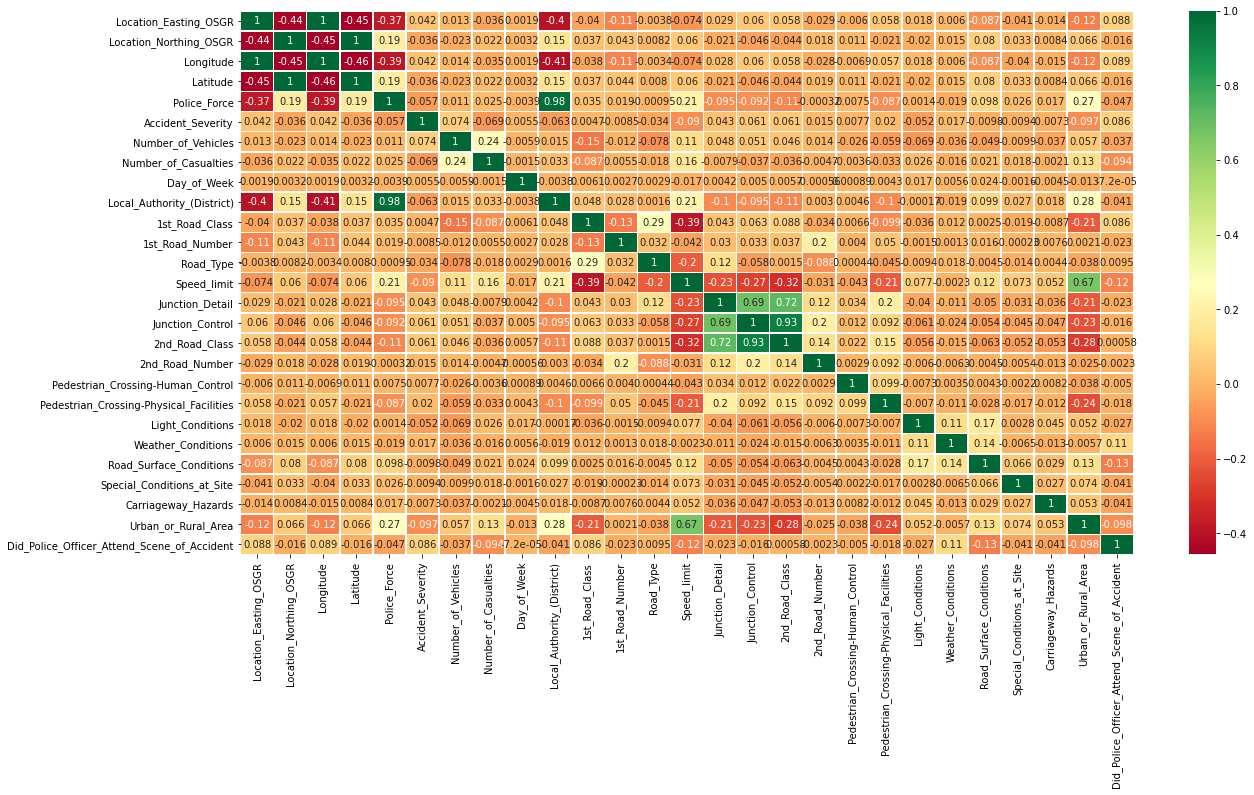

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, linewidths=.5, cmap='RdYlGn')
plt.show()

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.00,-0.44,1.00,-0.45,-0.37,0.04,0.01,-0.04,0.00,-0.40,-0.04,-0.11,-0.00,-0.07,0.03,0.06,0.06,-0.03,-0.01,0.06,0.02,0.01,-0.09,-0.04,-0.01,-0.12,0.09
Location_Northing_OSGR,-0.44,1.00,-0.45,1.00,0.19,-0.04,-0.02,0.02,0.00,0.15,0.04,0.04,0.01,0.06,-0.02,-0.05,-0.04,0.02,0.01,-0.02,-0.02,0.02,0.08,0.03,0.01,0.07,-0.02
Longitude,1.00,-0.45,1.00,-0.46,-0.39,0.04,0.01,-0.03,0.00,-0.41,-0.04,-0.11,-0.00,-0.07,0.03,0.06,0.06,-0.03,-0.01,0.06,0.02,0.01,-0.09,-0.04,-0.01,-0.12,0.09
Latitude,-0.45,1.00,-0.46,1.00,0.19,-0.04,-0.02,0.02,0.00,0.15,0.04,0.04,0.01,0.06,-0.02,-0.05,-0.04,0.02,0.01,-0.02,-0.02,0.01,0.08,0.03,0.01,0.07,-0.02
Police_Force,-0.37,0.19,-0.39,0.19,1.00,-0.06,0.01,0.03,-0.00,0.98,0.04,0.02,-0.00,0.21,-0.09,-0.09,-0.11,-0.00,0.01,-0.09,0.00,-0.02,0.10,0.03,0.02,0.27,-0.05
Accident_Severity,0.04,-0.04,0.04,-0.04,-0.06,1.00,0.07,-0.07,0.01,-0.06,0.00,-0.01,-0.03,-0.09,0.04,0.06,0.06,0.01,0.01,0.02,-0.05,0.02,-0.01,-0.01,-0.01,-0.10,0.09
Number_of_Vehicles,0.01,-0.02,0.01,-0.02,0.01,0.07,1.00,0.24,-0.01,0.02,-0.15,-0.01,-0.08,0.11,0.05,0.05,0.05,0.01,-0.03,-0.06,-0.07,-0.04,-0.05,-0.01,-0.04,0.06,-0.04
Number_of_Casualties,-0.04,0.02,-0.03,0.02,0.03,-0.07,0.24,1.00,-0.00,0.03,-0.09,0.01,-0.02,0.16,-0.01,-0.04,-0.04,-0.00,-0.00,-0.03,0.03,-0.02,0.02,0.02,-0.00,0.13,-0.09
Day_of_Week,0.00,0.00,0.00,0.00,-0.00,0.01,-0.01,-0.00,1.00,-0.00,0.01,0.00,0.00,-0.02,0.00,0.00,0.01,-0.00,0.00,0.00,0.02,0.01,0.02,-0.00,-0.00,-0.01,-0.00
Local_Authority_(District),-0.40,0.15,-0.41,0.15,0.98,-0.06,0.02,0.03,-0.00,1.00,0.05,0.03,0.00,0.21,-0.10,-0.09,-0.11,0.00,0.00,-0.10,-0.00,-0.02,0.10,0.03,0.02,0.28,-0.04


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,136575.0,448690.667033,95232.341097,76702.000000,386358.000000,454122.000000,527650.000000,6.552560e+05
Location_Northing_OSGR,136575.0,288342.219828,157073.980766,11075.000000,176425.500000,237455.000000,389758.000000,1.178623e+06
Longitude,136575.0,-1.305014,1.398975,-7.389809,-2.204337,-1.201362,-0.159759,1.757858e+00
Latitude,136575.0,52.482461,1.414527,49.919716,51.473777,52.024692,53.401876,6.049019e+01
Police_Force,136575.0,29.855962,25.252657,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,136575.0,2.816145,0.418181,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,136575.0,1.848208,0.710140,1.000000,1.000000,2.000000,2.000000,1.600000e+01
Number_of_Casualties,136575.0,1.327644,0.789327,1.000000,1.000000,1.000000,1.000000,5.800000e+01
Day_of_Week,136575.0,4.116046,1.917293,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),136575.0,342.742742,258.411076,1.000000,102.000000,323.000000,516.000000,9.410000e+02


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


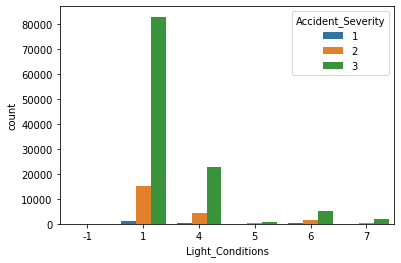

In [ ]:
sns.countplot(df['Light_Conditions'], hue = df['Accident_Severity'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


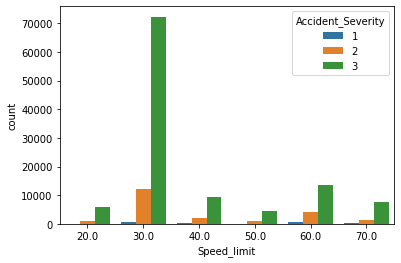

In [ ]:
sns.countplot(df['Speed_limit'], hue = df['Accident_Severity'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


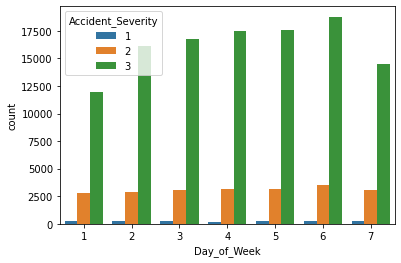

In [ ]:
sns.countplot(df['Day_of_Week'], hue = df['Accident_Severity'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


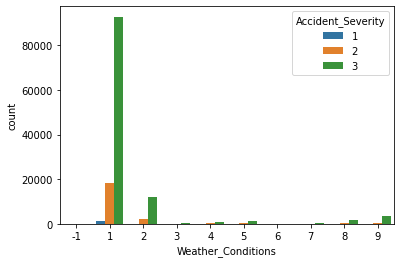

In [ ]:
sns.countplot(df['Weather_Conditions'], hue = df['Accident_Severity'])

# Crée un slice du dataset avec uniquement les colonnes numériques (tu peux utiliser la méthode select_dtypes pour t'aider. Tu nommeras ce slice : X.

In [ ]:
X = df.select_dtypes(np.number)
X.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

In [ ]:
X

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,3,28,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1
1,551920.0,174560.0,0.184928,51.449595,1,3,1,1,3,18,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1
2,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,3,26,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1
3,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,3,22,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1
4,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,3,25,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,319273.0,574564.0,-3.265390,55.058998,98,3,2,1,6,917,4,7076,6,30.0,3,4,4,725,0,0,4,1,2,0,0,2,1
136617,316143.0,568615.0,-3.312631,55.005033,98,3,2,2,3,917,4,7020,6,60.0,6,4,5,49,0,0,1,1,1,0,0,2,1
136618,322903.0,573365.0,-3.208249,55.048803,98,3,1,1,5,917,2,74,3,70.0,0,-1,-1,0,0,0,6,1,2,0,0,2,1
136619,318673.0,566850.0,-3.272584,54.989597,98,3,1,3,7,917,4,724,6,40.0,0,-1,-1,0,0,0,4,1,1,0,0,2,1


# Utilise un scaler pour mettre à l'échelle tes données. Tu transformeras tes données avec ce scaler, et tu enregistreras les données mises à l'échelle dans X_scaled.

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Instancie un objet pca dans le cas ou on ne sait pas encore le nombre de composantes principales que l'on souhaite calculer.

In [ ]:
pca = decomposition.PCA()

# Calcule les composantes principales de X_scaled et effectue une projection des individus avec pca.fit_transform(X_scaled).

In [ ]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.transform(X_scaled)

array([[-1.12639611e+00, -2.10299838e+00, -1.03381190e+00, ...,
         4.89478887e-02,  1.11009363e-02,  1.33667673e-03],
       [-3.40922166e+00,  5.97594150e-01,  5.47490686e-01, ...,
         4.39252911e-02,  9.67555398e-03,  2.81658335e-03],
       [-2.04765353e+00, -2.34886819e-01,  9.24510051e-01, ...,
         6.41661827e-02,  1.29748384e-02,  1.88647547e-03],
       ...,
       [ 5.65102358e+00, -2.94921273e-01,  9.35859531e-01, ...,
         2.59616772e-01, -2.24885839e-02, -3.96096999e-03],
       [ 4.95707405e+00,  5.91036990e-01, -2.64557663e-01, ...,
         2.80918903e-01, -1.93380933e-02, -4.31557805e-03],
       [ 5.88695664e+00,  8.93277601e-03,  9.19722606e-01, ...,
         2.67321395e-01, -9.60117303e-03, -2.96899635e-03]])

# Combien de composantes principales expliquent au moins 70% de la variance ? Tu peux t'aider de l'attribut pca.explained_variance_ratio_. Et 80% ?

In [ ]:
print(pca.explained_variance_)
print('-------------------------------------------------------------------')
print(pca.explained_variance_ratio_)
print('-------------------------------------------------------------------')
print(pca.explained_variance_ratio_.cumsum())

[3.78762449e+00 2.83813658e+00 1.87840235e+00 1.62239736e+00
 1.32958254e+00 1.27663867e+00 1.16974628e+00 1.09360843e+00
 1.07975579e+00 1.02427261e+00 1.00042447e+00 9.83644444e-01
 9.77159264e-01 9.24457294e-01 9.13906554e-01 8.71399472e-01
 8.32328963e-01 7.60920571e-01 7.20705473e-01 6.93659733e-01
 5.30825655e-01 3.29645933e-01 2.80661817e-01 6.29695673e-02
 1.69272569e-02 3.77181832e-04 1.89447218e-05]
-------------------------------------------------------------------
[1.40281361e-01 1.05115400e-01 6.95699481e-02 6.00883511e-02
 4.92434372e-02 4.72825674e-02 4.33236192e-02 4.05037193e-02
 3.99906624e-02 3.79357448e-02 3.70524870e-02 3.64310090e-02
 3.61908189e-02 3.42389083e-02 3.38481430e-02 3.22738182e-02
 3.08267729e-02 2.81820370e-02 2.66925999e-02 2.56909131e-02
 1.96600655e-02 1.22090192e-02 1.03948060e-02 2.33218912e-03
 6.26930849e-04 1.39695952e-05 7.01651226e-07]
-------------------------------------------------------------------
[0.14028136 0.24539676 0.31496671 0.37

In [ ]:
np.argmax((np.cumsum(pca.explained_variance_ratio_) > 0.70))

11

In [ ]:
array = pca.explained_variance_ratio_.cumsum()

def cumul(array,variance):
  i = 0
  for j in array:
    while j<variance:
      i+=1
      break
  return i+1

In [ ]:
cumul(array,0.7) # 70%

12

In [ ]:
cumul(array,0.8) #80%

15